In [48]:
cd ~/dv/sns-chops/resolution/ARCS/

/SNS/users/lj7/dv/sns-chops/resolution/ARCS


In [4]:
import pandas as pd
import numpy as np
import scipy as sp
import plotly.plotly as py

In [38]:
import resolution_plot
reload(resolution_plot)

<IPython.core.display.Javascript object>

<module 'resolution_plot' from 'resolution_plot.pyc'>

In [39]:
fc1data = resolution_plot.ExpData('./V_Cali_Int_Res_FC1_2018_v2.dat')
fc2data = resolution_plot.ExpData('./V_Cali_Int_Res_FC2_2018_v2.dat')
fc1_highres_data = resolution_plot.ExpData('./V_Cali_Int_Res_FC1_HighRes_2018_v2.dat')

reading data. please wait...
  done
reading data. please wait...
  done
reading data. please wait...
  done


# High intensity

In [3]:
# more HighIntensitySetting.txt

In [25]:
f = 'HighIntensitySetting.txt'
text = open(f).read()
newtext = text.replace('\t', ' ').replace('\r', '')
newtext = '\n'.join(newtext.splitlines()[1:])
open('HighIntensitySetting-fixed.txt', 'wt').write(newtext)

In [26]:
# more HighIntensitySetting-fixed.txt

In [44]:
datamap = {1: fc1data, 2: fc2data}

fwhms = list()
ints = list()
Eis = list()
for Ei, Chopper, Speed, T0 in np.loadtxt('HighIntensitySetting-fixed.txt', delimiter=','):
    data = datamap[Chopper]
    condition1 = np.logical_and(np.isclose(data.vdata.Energy, Ei), np.isclose(data.chopper_freqs, Speed))
    # print fc1data.vdata.Chopper3[condition1]
    fwhms += list(data.FWHM[condition1])
    ints += list(data.intensity[condition1])
    Eis += list(data.vdata.Ei[condition1])
    continue

In [46]:
%matplotlib notebook
from matplotlib import pyplot as plt

<IPython.core.display.Javascript object>


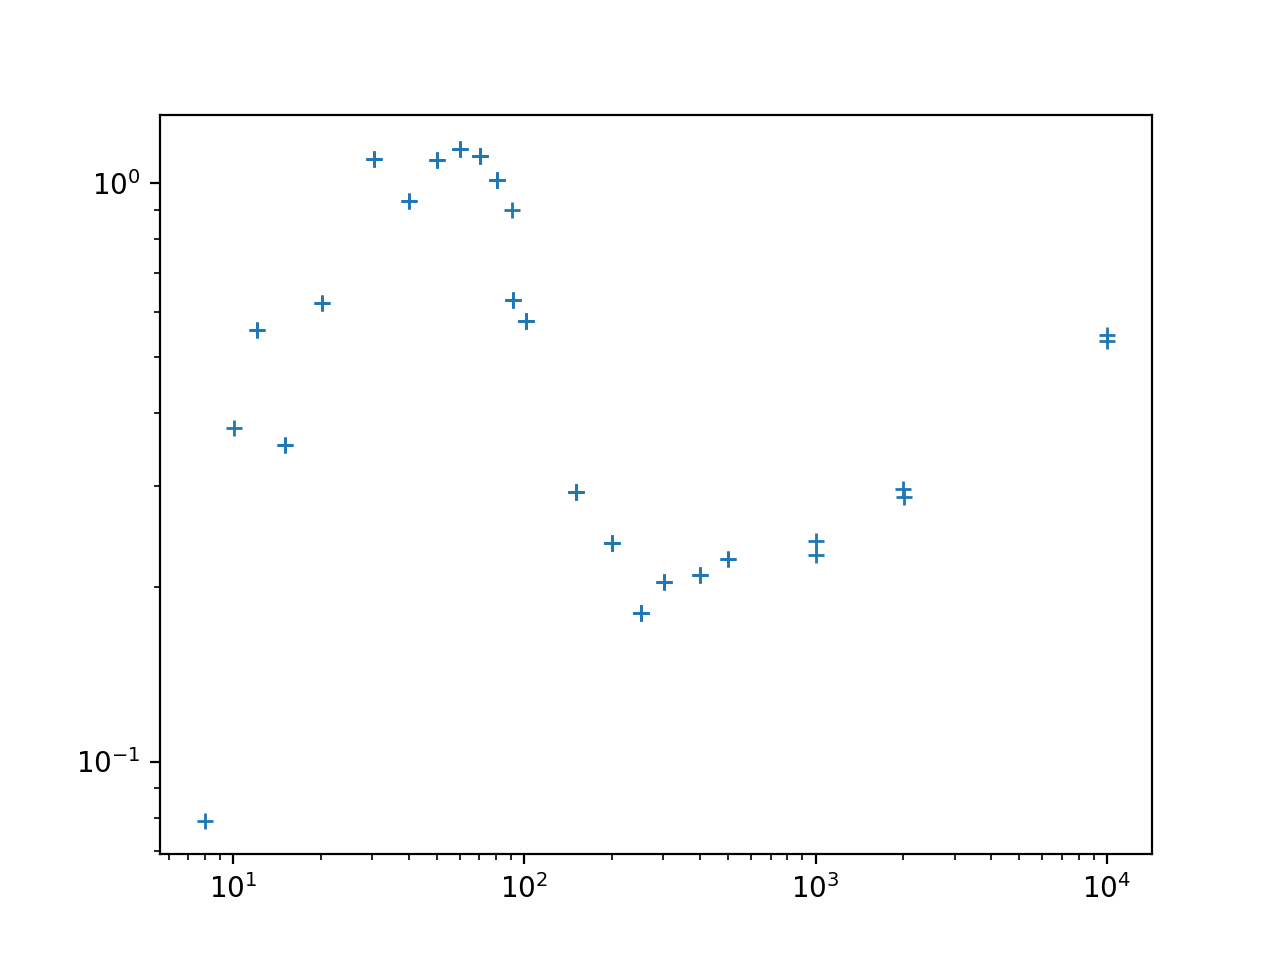

In [55]:
plt.figure()
plt.loglog(Eis, ints, '+')

# High Resolution

In [57]:
datamap = {1: fc1_highres_data, 2: fc2data}

fwhms = list()
ints = list()
Eis = list()
for Ei, Chopper, Speed, T0 in np.loadtxt('HighResSetting.txt', delimiter=','):
    data = datamap[Chopper]
    condition1 = np.logical_and(np.isclose(data.vdata.Energy, Ei), np.isclose(data.chopper_freqs, Speed))
    # print fc1data.vdata.Chopper3[condition1]
    fwhms += list(data.FWHM[condition1])
    ints += list(data.intensity[condition1])
    Eis += list(data.vdata.Ei[condition1])
    continue

<IPython.core.display.Javascript object>


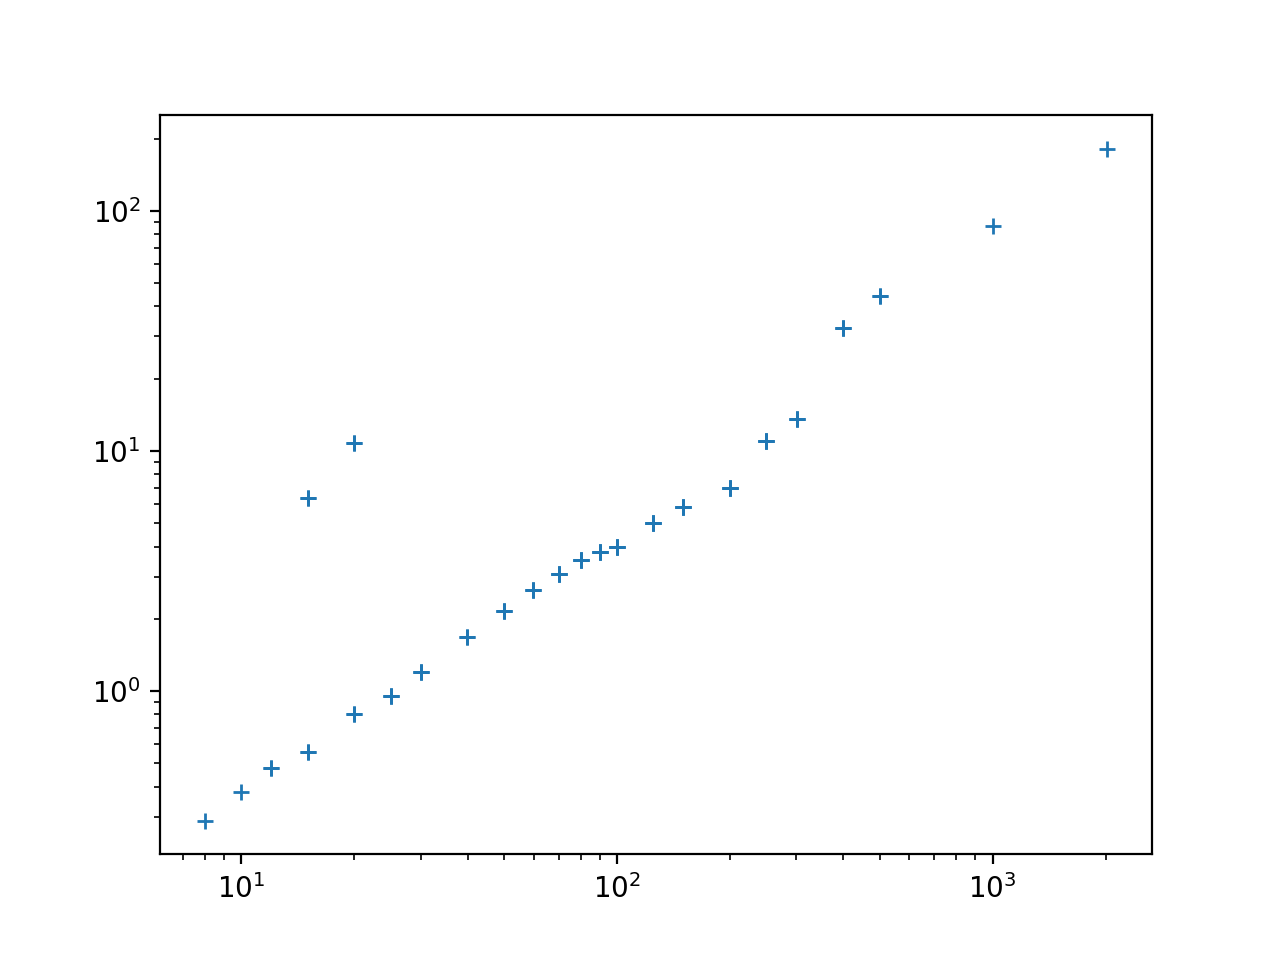

In [58]:
plt.figure()
plt.loglog(Eis, fwhms, '+')